In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import pandas as pd

#from scipy.stats import norm

# Parte 1

1. Suponga que se cuenta con una prueba para detectar la enfermedad A, que es positiva el 90% 
de las veces cuando se realiza en un paciente que tiene dicha enfermedad, y es negativa el 95% 
de las veces cuando se realiza en una persona que no tiene la enfermedad. También se sabe que 
la enfermedad afecta a un 1% de la población.  
 
2. Construya  una  muestra  aleatoria  de  tamaño  100000,  que  contenga  “Sí”  y  “No”,  con 
probabilidades de 1% y 99%, respectivamente.

In [2]:
n=100000

def crear_muestra_aleatoria():
  return random.choices(["Sí", "No"], k=n, weights=[0.01, 0.99])

In [3]:
muestra = crear_muestra_aleatoria()

df=pd.DataFrame({"Infectado": muestra})
df.head()

,Infectado
0,No
1,No
2,No
3,No
4,No


In [4]:
df.value_counts()

Infectado
No           98970
Sí            1030
Name: count, dtype: int64

In [5]:
def calcular_probabilidad(muestra):
  contador = collections.Counter(muestra)
  return (contador["Sí"] / len(muestra), contador["No"] / len(muestra))

muestra = crear_muestra_aleatoria()
probabilidad = calcular_probabilidad(muestra)

print(probabilidad)

(0.01013, 0.98987)


3. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que 
de  cuenta  de  que  la  probabilidad  de  que  el  test  salga  “Negativo”  dado  que  “No”  tiene  la 
enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo 
con si tiene o no tiene la enfermedad. 

4. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que 
de cuenta de que la probabilidad de que el test salga “Positivo” dado que “Sí” tiene la 
enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo 
con si tiene o no tiene la enfermedad.

In [6]:
# Agregar la columna "Resultado_test" basada en las reglas de probabilidad
df["Resultado_test"] = np.where((df["Infectado"] == "Sí") & (np.random.rand(n) < 0.9), "Positivo", "Negativo")
df.loc[(df["Infectado"] == "No") & (np.random.rand(n) < 0.05), "Resultado_test"] = "Positivo"

# Verificar la proporción final de "Resultado_test"
proporcion_resultado = df["Resultado_test"].value_counts(normalize=True)
print(proporcion_resultado)

Resultado_test
Negativo    0.94121
Positivo    0.05879
Name: proportion, dtype: float64


In [7]:
df.groupby(["Infectado","Resultado_test"])[["Resultado_test"]].count()

Resultado_test
Infectado Resultado_test                
No        Negativo                 94019
          Positivo                  4951
Sí        Negativo                   102
          Positivo                   928

In [8]:
df.groupby(["Resultado_test","Infectado"])[["Resultado_test"]].count()

Resultado_test
Resultado_test Infectado                
Negativo       No                  94019
               Sí                    102
Positivo       No                   4951
               Sí                    928

In [9]:
df

,Infectado,Resultado_test
0,No,Negativo
1,No,Negativo
2,No,Negativo
3,No,Negativo
4,No,Negativo
...,...,...
99995,No,Negativo
99996,No,Negativo
99997,No,Negativo
99998,No,Negativo


5. Calcule la probabilidad de tener la enfermedad dado que el test salió positivo. Realice los 
cálculos utilizando las variables simuladas. 

In [10]:

pacientes_infectados_positivos = df[(df["Infectado"] == "Sí") & (df["Resultado_test"] == "Positivo")]
pacientes_infectados_positivos = pacientes_infectados_positivos.shape[0]

pacientes_positivos= df[df["Resultado_test"] == "Positivo"]
pacientes_positivos= pacientes_positivos.shape[0]


probabilidad_infectado_verdadero_positivo = pacientes_infectados_positivos/pacientes_positivos

print(f"Infectados con test positivo: {pacientes_infectados_positivos}")
print(f"Total test positivos: {pacientes_positivos}")
print(f"Probabilidad de estar infectado con test positivo:  {probabilidad_infectado_verdadero_positivo}")


Infectados con test positivo: 928
Total test positivos: 5879
Probabilidad de estar infectado con test positivo:  0.1578499744854567


6. Realice los cálculos del punto anterior, utilizando la información del enunciado y el Teorema 
de Bayes. ¿Qué puede concluir? 

Para calcular la probabilidad de tener la enfermedad dado que el test salió positivo utilizando el Teorema de Bayes y la información del enunciado, podemos seguir los pasos que se mencionaron previamente. Aquí está el cálculo:

1. Probabilidad de tener la enfermedad (P(Enfermedad)):
   - En el enunciado, se menciona que el 1% de la muestra tiene la enfermedad, por lo que \(P({Enfermedad}) = 0.01\).

2. Probabilidad de obtener un resultado positivo en el test dado que se tiene la enfermedad (P(Positivo | Enfermedad)):
   - En el enunciado, se establece que el 90% de las personas infectadas obtiene un resultado positivo, es decir, \(P({Positivo} | {Enfermedad}) = 0.9\).

3. Probabilidad de no tener la enfermedad (P(¬Enfermedad)):
   - \(P({¬Enfermedad}) = 1 - P({Enfermedad}) = 0.99\).

4. Probabilidad de obtener un resultado positivo en el test dado que no se tiene la enfermedad (P(Positivo | ¬Enfermedad)):
   - En el enunciado, se establece que el 5% de las personas no infectadas obtiene un resultado positivo, es decir, \(P({Positivo} | {¬Enfermedad}) = 0.05\).

5. Probabilidad de obtener un resultado positivo en el test (P(Positivo)):
   - Utilizando el teorema de probabilidad total:
   \[P({Positivo}) = P({Positivo} | {Enfermedad}) \cdot P({Enfermedad}) + P({Positivo} | {¬Enfermedad}) \cdot P({¬Enfermedad})\]
   - Sustituyendo los valores:
   \[P({Positivo}) = 0.9 \cdot 0.01 + 0.05 \cdot 0.99\]
   \[P({Positivo}) = 0.0145\]

6. Probabilidad de tener la enfermedad dado que el test salió positivo (P(Enfermedad | Positivo)):
   - Utilizando el Teorema de Bayes:
   \[P({Enfermedad} | {Positivo}) = \frac{P({Positivo} | {Enfermedad}) \cdot P({Enfermedad})}{P({Positivo})}\]
   - Sustituyendo los valores:
   \[P({Enfermedad} | {Positivo}) = \frac{0.9 \cdot 0.01}{0.0145} \approx 0.6207\]

Por lo tanto, la probabilidad de tener la enfermedad dado que el test salió positivo es aproximadamente 0.6207 o alrededor del 62.07%. Esto significa que si alguien obtiene un resultado positivo en el test, la probabilidad de que realmente tenga la enfermedad es del 62.07%.

In [11]:
# Probabilidad de tener la enfermedad (P(Enfermedad))
p_enfermedad = 0.01

# Probabilidad de obtener un resultado positivo en el test dado que se tiene la enfermedad (P(Positivo | Enfermedad))
p_positivo_enfermedad = 0.9

# Probabilidad de no tener la enfermedad (P(¬Enfermedad))
p_no_enfermedad = 1 - p_enfermedad

# Probabilidad de obtener un resultado positivo en el test dado que no se tiene la enfermedad (P(Positivo | ¬Enfermedad))
p_positivo_no_enfermedad = 0.05

# Probabilidad de obtener un resultado positivo en el test (P(Positivo))
p_positivo = (p_positivo_enfermedad * p_enfermedad) + (p_positivo_no_enfermedad * p_no_enfermedad)

# Probabilidad de tener la enfermedad dado que el test salió positivo (P(Enfermedad | Positivo))
p_enfermedad_positivo = (p_positivo_enfermedad * p_enfermedad) / p_positivo

print("Probabilidad de tener la enfermedad dado que el test salió positivo:", p_enfermedad_positivo)


Probabilidad de tener la enfermedad dado que el test salió positivo: 0.15384615384615385


# Parte 2

7. Simule 1000 valores para cada una de las distribuciones de probabilidad uniforme discreta, 
binomial, Poisson, uniforme continua, normal y Exponencial. Especifique libremente los 
parámetros para cada una de ellas. Encuentre media y desviación estándar muestral para cada 
uno de los vectores simulados y compare dichos resultados con los obtenidos con las fórmulas 
de valor esperado y desviación estándar teoricos. 

### Distribución de probabilidad uniforme discreta

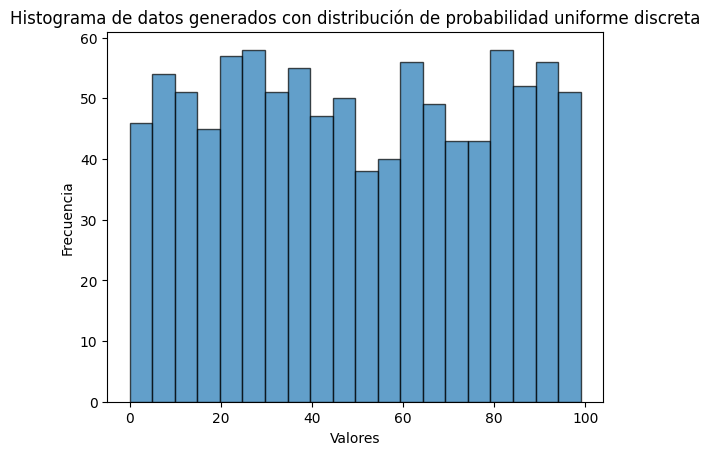

In [18]:
n = 1000
dpud = np.random.randint(low=0, high=100, size=n)

plt.hist(dpud, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados con distribución de probabilidad uniforme discreta')

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad binomial

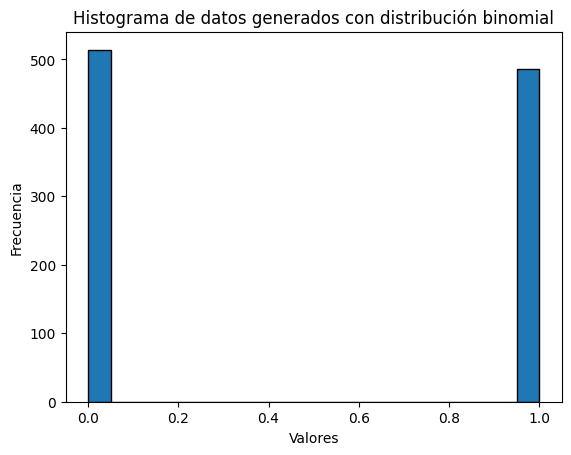

In [13]:
N = 1000
dpb = np.random.binomial(n=1, p=0.5, size=N)

plt.hist(dpb, bins=20, edgecolor='k')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados con distribución binomial')

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad poisson

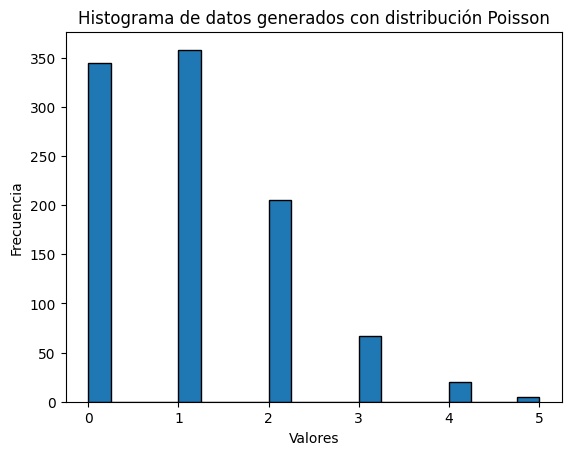

In [14]:
dpp = np.random.poisson(lam=1.0, size=N)

plt.hist(dpp, bins=20, edgecolor='k')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados con distribución Poisson')

# Mostrar la gráfica
plt.show()

### Distribuicón uniforme continua

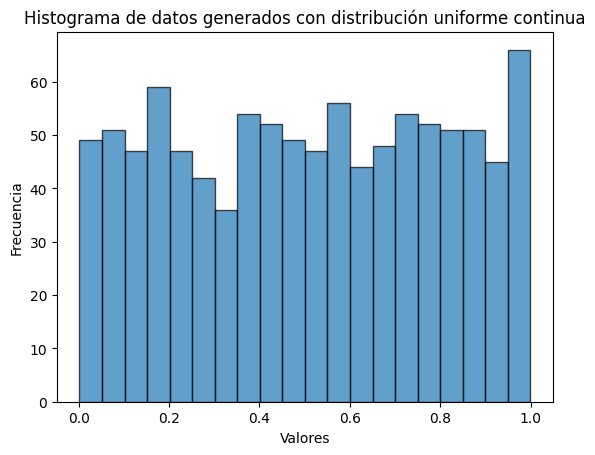

In [19]:
n = 1000
duc = np.random.uniform(low=0.0, high=1.0, size=n)

plt.hist(duc, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados con distribución uniforme continua')

# Mostrar la gráfica
plt.show()

### Distribuicón normal

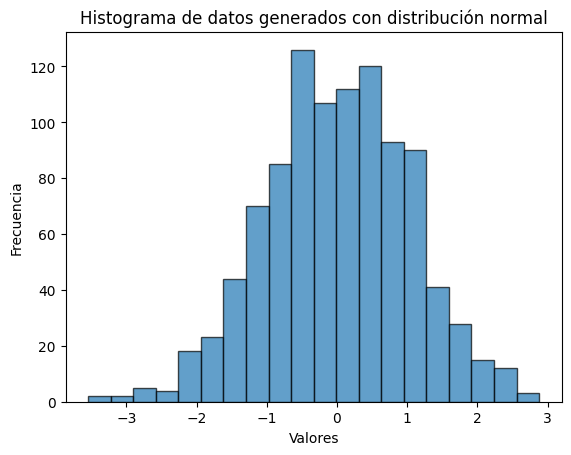

In [21]:
dnorm = np.random.normal(loc=0, scale=1, size=N)

plt.hist(dnorm, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados con distribución normal')

# Mostrar la gráfica
plt.show()

In [22]:
df_resumen =pd.DataFrame({"dist_prob_unif_dis": dpud, 
                          "dist_prob_binom":dpb, 
                          "dist_prob_poisson":dpp, 
                          "dist_prob_unif_cont":duc,
                          "dist_prob_norm":dnorm})
df_resumen.describe()

,dist_prob_unif_dis,dist_prob_binom,dist_prob_poisson,dist_prob_unif_cont,dist_prob_norm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.504000,0.486000,1.074000,0.510618,0.010009
std,29.194662,0.500054,1.036146,0.292953,1.021720
min,0.000000,0.000000,0.000000,0.001628,-3.542995
25%,24.000000,0.000000,0.000000,0.249527,-0.658688
50%,48.000000,0.000000,1.000000,0.512461,0.032605
75%,76.000000,1.000000,2.000000,0.764921,0.729433
max,99.000000,1.000000,5.000000,0.999388,2.879066
